# TP Large Scale Kernel Methods

In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_svmlight_file

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from time import time
from sklearn import svm

## Chargement et partitionnement des données

In [3]:
###############################################################################
# Requires file ijcnn1.dat.gz to be present in the directory

dataset_path = '../ijcnn1.dat'
ijcnn1 = load_svmlight_file(dataset_path)
X = ijcnn1[0].todense()
y = ijcnn1[1]

###############################################################################
# Extract features

X_train, X_test, y_train, y_test = train_test_split(X[:60000, :], y[:60000],
                     train_size=20000, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n1, p = X_train.shape
n2 = X_test.shape[0]

print("Nombre d'exemples d'apprentissage:", n1)
print("Nombre d'exemples de test:", n2)
print("Nombre de features:", p)

Nombre d'exemples d'apprentissage: 20000
Nombre d'exemples de test: 40000
Nombre de features: 22


## Question 1

On va fitter nos données d'apprentissage avec un SVM linéaire et un SVM non-linéaire (noyau Gaussien) pour comparer leur score de prédiction ainsi que le temps de calcul nécessaire à l'apprentissage et à la prédiction.

In [4]:
from sklearn.svm import SVC, LinearSVC
from time import time
from sklearn import svm

print("Fitting SVC rbf on %d samples..." % X_train.shape[0])
t0 = time()
# TODO
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC rbf on %d samples..." % X_test.shape[0])
t1 = time()
# TODO
accuracy_kernel = accuracy_score(clf.predict(X_test), y_test)
print("done in %0.3fs" % (time() - t1))
timing_kernel = time() - t0
print("classification accuracy: %0.3f" % accuracy_kernel)

# TODO same for LinearSVC

print("Fitting SVC linear on %d samples..." % X_train.shape[0])
t0 = time()
# TODO
clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % X_test.shape[0])
t1 = time()
# TODO
accuracy_linear = accuracy_score(clf.predict(X_test), y_test)
print("done in %0.3fs" % (time() - t1))
timing_linear = time() - t0
print("classification accuracy: %0.3f" % accuracy_linear)

Fitting SVC rbf on 20000 samples...
done in 3.771s
Predicting with SVC rbf on 40000 samples...
done in 4.186s
classification accuracy: 0.980
Fitting SVC linear on 20000 samples...
done in 0.061s
Predicting with SVC linear on 40000 samples...
done in 0.046s
classification accuracy: 0.917


## Question 2

On code une fonction qui calcule la meilleure approximation de rang $k$.

In [5]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

def rank_trunc(gram_mat, k, fast=True):
    """
    k-th order approximation of the Gram Matrix G.

    Parameters
    ----------
    gram_mat : array, shape (n_samples, n_samples)
        the Gram matrix
    k : int
        the order approximation
    fast : bool
        use svd (if False) or svds (if True).

    Return
    ------
    gram_mat_k : array, shape (n_samples, n_samples)
        The rank k Gram matrix.
    """
    if fast:
        print("calcul de la matrice complète avec fast")
        u, s, vt = svds(gram_mat, k)
        gram_mat_k = u @ np.diag(s) @ vt
    else:
        print("calcul avec la méthode lente")
        u,s,vt = svd(gram_mat)
        gram_mat_k = u[:,:k] @ np.diag(s[:k]) @ vt[:k]
        

    return gram_mat_k

In [47]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs
gram_mat = csc_matrix([[1, 0, 0], [5, 0, 2], [0, -1, 0], [0, 0, 3]], dtype=float)
u, s, vt = svds(gram_mat, k=2)
vt.shape

(2, 3)

## Question 3

On applique cette fonction sur la matrice décrite dans le sujet de TP.

In [6]:
p = 200
r_noise = 100
r_signal = 20

intensity = 50

rng = np.random.RandomState(42)
X_noise = rng.randn(r_noise, p)
X_signal = rng.randn(r_signal, p)

gram_signal = np.dot(X_noise.T, X_noise) + intensity * np.dot(X_signal.T,
                                                              X_signal)
n_ranks = 100
ranks = np.arange(1, n_ranks + 1)
timing_fast = np.zeros(n_ranks)
timing_slow = np.zeros(n_ranks)
rel_error = np.zeros(n_ranks)

for k, rank in enumerate(ranks):
    print(k, rank)
    t0 = time()
    gram_mat_k = rank_trunc(gram_signal, rank, fast=True)
    timing_fast[k] = time() - t0

    t0 = time()
    gram_mat_k = rank_trunc(gram_signal, rank, fast=False)
    timing_slow[k] = time() - t0

    # TODO: compute relative error with Frobenius norm
    rel_error[k] = np.linalg.norm(gram_mat_k-gram_signal, 'fro')/np.linalg.norm(gram_signal, 'fro')
    rel_error

0 1
calcul de la matrice complète avec fast
calcul avec la méthode lente
1 2
calcul de la matrice complète avec fast
calcul avec la méthode lente
2 3
calcul de la matrice complète avec fast
calcul avec la méthode lente
3 4
calcul de la matrice complète avec fast
calcul avec la méthode lente
4 5
calcul de la matrice complète avec fast
calcul avec la méthode lente
5 6
calcul de la matrice complète avec fast
calcul avec la méthode lente
6 7
calcul de la matrice complète avec fast
calcul avec la méthode lente
7 8
calcul de la matrice complète avec fast
calcul avec la méthode lente
8 9
calcul de la matrice complète avec fast
calcul avec la méthode lente
9 10
calcul de la matrice complète avec fast
calcul avec la méthode lente
10 11
calcul de la matrice complète avec fast
calcul avec la méthode lente
11 12
calcul de la matrice complète avec fast
calcul avec la méthode lente
12 13
calcul de la matrice complète avec fast
calcul avec la méthode lente
13 14
calcul de la matrice complète avec fas

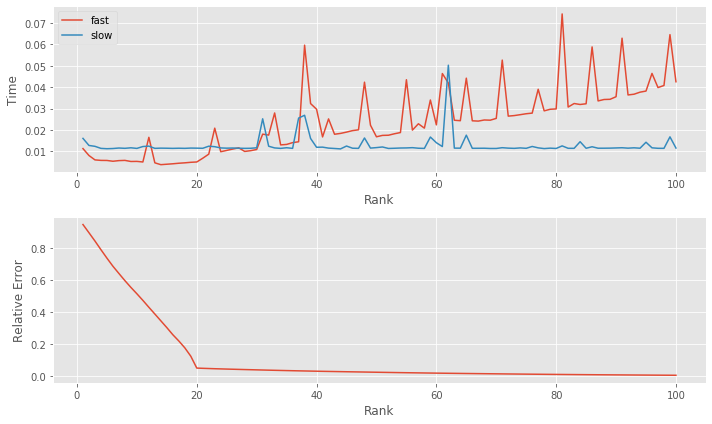

In [52]:
###############################################################################
# Display

f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,6))
ax1, ax2 = axes.ravel()

ax1.plot(ranks, timing_fast, '-', label='fast')
ax1.plot(ranks, timing_slow, '-', label='slow')
ax1.legend()

ax1.set_xlabel('Rank')
ax1.set_ylabel('Time')
ax2.plot(ranks, rel_error, '-')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Relative Error')
plt.tight_layout()
plt.show()

In [ ]:
On remarque que la tendance varie 

## Question 4

On va implémenter l'algorithme de Random Kernel Features pour le noyau Gaussien.

In [8]:
def random_features(X_train, X_test, gamma, c=300, seed=44):
    """Compute random kernel features

    Parameters
    ----------
    X_train : array, shape (n_samples1, n_features)
        The train samples.
    X_test : array, shape (n_samples2, n_features)
        The test samples.
    gamma : float
        The Gaussian kernel parameter
    c : int
        The number of components
    seed : int
        The seed for random number generation

    Return
    ------
    X_new_train : array, shape (n_samples1, c)
        The new train samples.
    X_new_test : array, shape (n_samples2, c)
        The new test samples.
    """
    rng = np.random.RandomState(seed)
    
    # TODO
    
    # n_features = p
    # n_samples1 = n1 ou n2
    n_samples1, n_features = X_train.shape
    n_samples2, n_features = X_test.shape
   
    W = np.random.normal(0, np.sqrt(2*gamma), size = (n_features,c))
    b = np.random.uniform(0, np.sqrt(2*np.pi), size = (1,c))
    
    X_new_train = np.vstack([np.sqrt(2/c)*np.cos(X_train[i]@W+b) for i in range(n_samples1)])
    X_new_test = np.vstack([np.sqrt(2/c)*np.cos(X_test[i]@W+b) for i in range(n_samples2)])
    
    return X_new_train, X_new_test

## Question 5

On va maintenant appliquer cette méthode avec $c=300$.

In [9]:
n_samples, n_features = X_train.shape
n_samples_test, _ = X_test.shape
gamma = 1. / n_features

Z_train, Z_test = random_features(X_train, X_test, gamma, c=300, seed=44)

print("Fitting SVC linear on %d samples..." % n_samples)
t0 = time()
clf = LinearSVC(dual=False)
clf.fit(Z_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % n_samples_test)
t0 = time()
accuracy = clf.score(Z_test, y_test)
print("done in %0.3fs" % (time() - t0))
print("classification accuracy: %0.3f" % accuracy)

Fitting SVC linear on 20000 samples...
done in 1.083s
Predicting with SVC linear on 40000 samples...
done in 0.027s
classification accuracy: 0.967


On observe un boost dans la performance en temps et en score par rapport aux résultats de la question 1.

## Question 6

On implémente la méthode de Nystrom.

In [84]:
from sklearn.metrics.pairwise import rbf_kernel

def nystrom(X_train, X_test, gamma, c=500, k=200, seed=44):
    """Compute nystrom kernel approximation

    Parameters
    ----------
    X_train : array, shape (n_samples1, n_features)
        The train samples.
    X_test : array, shape (n_samples2, n_features)
        The test samples.
    gamma : float
        The Gaussian kernel parameter
    c : int
        The number of points to sample for the approximation
    k : int
        The number of components
    seed : int
        The seed for random number generation

    Return
    ------
    X_new_train : array, shape (n_samples1, c)
        The new train samples.
    X_new_test : array, shape (n_samples2, c)
        The new test samples.
    """
    rng = np.random.RandomState(seed)
    n_samples = X_train.shape[0]
    idx = rng.choice(n_samples, c)

    X_train_idx = X_train[idx, :]
    W = rbf_kernel(X_train_idx, X_train_idx, gamma=gamma)  #calcul des variables à noyaux
    # idx ou I: indices des lignes tirées
    
    U, s, Vh = linalg.svd(W)
    print('Shape of U: ', U.shape)
    print('Shape of s: ', s.shape)
    print('Shape of Vh: ', Vh.shape)
    
    W_k = U[:,:k] @ np.diag(s[:k]) @ Vh[:k, :]
    
    
    from scipy.linalg import fractional_matrix_power
    sigma = fractional_matrix_power(np.diag(s[:k]), -0.5)
    
    M_k = Vh[:,:k] @ sigma
    
    Ctrain = rbf_kernel(X_train,X_train_idx, gamma= gamma)
    Ctest = rbf_kernel(X_test,X_train_idx, gamma = gamma)
    
    X_new_train = Ctrain @ M_k
    X_new_test = Ctest @ M_k
    
    return X_new_train, X_new_test

## Question 7

On va maintenant appliquer cette méthode également avec $c=500$ et $k=300$

In [85]:
from scipy.linalg import fractional_matrix_power

Z_train, Z_test = nystrom(X_train, X_test, gamma, c=500, k=300, seed=44)

print("Fitting SVC linear on %d samples..." % n_samples)
t0 = time()
clf = LinearSVC(dual=False)
clf.fit(Z_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % n_samples_test)
t0 = time()
accuracy = clf.score(Z_test, y_test)
print("done in %0.3fs" % (time() - t0))
print("classification accuracy: %0.3f" % accuracy)


Shape of U:  (500, 500)
Shape of s:  (500,)
Shape of Vh:  (500, 500)
Fitting SVC linear on 20000 samples...
done in 4.037s
Predicting with SVC linear on 40000 samples...
done in 0.023s
classification accuracy: 0.969


## Question 8

On va maintenant réaliser une synthèse des performances des RKF et de Nystrom pour un ensemble de paramètres.

In [89]:
ranks = np.arange(20, 600, 50)
n_ranks = len(ranks)
timing_rkf = np.zeros(n_ranks)
timing_nystrom = np.zeros(n_ranks)

accuracy_nystrom = np.zeros(n_ranks)
accuracy_rkf = np.zeros(n_ranks)

print("Training SVMs for various values of c...")

k = c -10
print(k)

for i, c in enumerate(ranks):
    print(i, c)
    # TODO: compute time and prediction scores for RKF and Nystrom with respect to c
    # put results in timing_rkf, timing_nystrom, accuracy_rkf, accuracy_nystrom
    
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train, y_train)
    print("done in %0.3fs" % (time() - t0))

    print("Predicting with SVC linear on %d samples..." % n_samples_test)
    t0 = time()
    accuracy = clf.score(Z_test, y_test)
    print("done in %0.3fs" % (time() - t0))
    print("classification accuracy: %0.3f" % accuracy)
    

Training SVMs for various values of c...
560
0 20
done in 4.605s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
1 70
done in 3.974s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
2 120
done in 3.957s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
3 170
done in 3.959s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
4 220
done in 4.389s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
5 270
done in 4.028s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
6 320
done in 4.017s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
7 370
done in 4.030s
Predicting with SVC linear on 40000 samples...
done in 0.022s
classification accuracy: 0.969
8 420
done in 4.038s
Predicting with SVC line

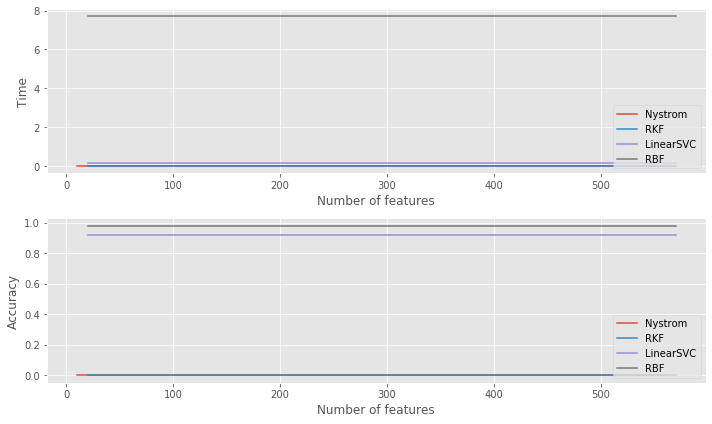

In [90]:
###############################################################################
# Display bis

f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,6))
ax1, ax2 = axes.ravel()

ax1.plot(ranks-10, timing_nystrom, '-', label='Nystrom')
ax1.plot(ranks, timing_rkf, '-', label='RKF')
ax1.plot(ranks, timing_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax1.plot(ranks, timing_kernel * np.ones(n_ranks), '-', label='RBF')

ax1.set_xlabel('Number of features')
ax1.set_ylabel('Time')
ax1.legend(loc='lower right')

ax2.plot(ranks-10, accuracy_nystrom, '-', label='Nystrom')
ax2.plot(ranks, accuracy_rkf, '-', label='RKF')
ax2.plot(ranks, accuracy_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax2.plot(ranks, accuracy_kernel * np.ones(n_ranks), '-', label='RBF')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()